In [1]:
library(rliger)
library(Seurat)
library(cluster)
library(MOFA2)
library(Signac)
library("fgsea", quietly = TRUE)

seurat <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_seurat.rds")
mofa <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mofa.rds")
liger <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_liger.rds")
mcia <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_mcia.rds")
icluster <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_icluster.rds")
tica <- readRDS("/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/process/astar_tica.rds")

Loading required package: cowplot

Loading required package: Matrix

Loading required package: patchwork


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots


Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject


Attaching package: ‘MOFA2’


The following object is masked from ‘package:stats’:

    predict




In [8]:
seurat

An object of class Seurat 
709875 features across 378 samples within 3 assays 
Active assay: SCT (16668 features, 3000 variable features)
 2 other assays present: RNA, ATAC
 5 dimensional reductions calculated: lsi, umap.atac, pca, umap.rna, wnn.umap

In [12]:
seurat[["ATAC"]]

ChromatinAssay data with 665282 features for 378 cells
Variable features: 665282 
Genome: hg38 
Annotation present: TRUE 
Motifs present: FALSE 
Fragment files: 1 

In [ ]:
seurat[[]]

In [ ]:
# 获得metagenes
# MOFA2

In [9]:
metagenes_mofa <- mofa@expectations$W$RNA

In [ ]:
# liger

In [10]:
metagenes_liger <- t(liger@W)

In [ ]:
# mcia

In [11]:
dim(mcia$mcoa$axis)

[1] 678401     15

In [19]:
head(mcia$mcoa$axis)

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6,Axis7,Axis8,Axis9,Axis10,Axis11,Axis12,Axis13,Axis14,Axis15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A1BG,-1.774179,0.378371240,1.06290322,-0.24787430,-0.9236122,0.4342407,-1.4526648,-0.006751329,0.4021690,1.2870713,-0.8071357,0.7789623,-0.05882998,0.4819433,-1.4135369
A1BG.AS1,-0.481041,2.515786613,-0.54768507,0.02112326,-0.6816301,0.3342524,0.4923588,-0.254313207,4.2156144,-1.1161850,1.3138520,0.1146542,0.22486671,-0.4324380,0.3846436
A4GALT,-3.082301,-0.525195123,-5.18381139,-0.45200851,-1.8862021,1.3828132,0.5623725,-1.058947067,0.5705312,3.0800995,-2.0601376,-16.7758373,-14.20954227,-15.9775900,2.0578602
AAAS,-0.680713,1.236173917,-0.83949853,-0.23530508,-1.0846615,-0.0398386,-0.3887579,0.537325558,-0.1516353,-0.7549201,-1.0415386,0.4891625,0.23489301,-1.1387059,0.5464906
AACS,-2.088713,-0.001061085,-0.03493483,0.01305581,-0.8157710,-0.5755069,-0.9656286,-0.544762252,-0.2289972,-0.6498452,-0.1858684,-0.5975686,-4.70988202,1.0840281,0.7828716
AACSP1,1.623560,1.335367394,1.73852969,8.45565620,0.9885225,1.6374615,-2.0429975,-2.959009317,-1.3759513,1.1724143,-0.6631845,0.2793819,-0.80847518,0.7975516,-3.2872325


In [21]:
mcia$mcoa$axis[16507:16520,]

,Axis1,Axis2,Axis3,Axis4,Axis5,Axis6,Axis7,Axis8,Axis9,Axis10,Axis11,Axis12,Axis13,Axis14,Axis15
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,0.21944375,0.4527251,-0.1376365,-0.303694157,-0.49422044,0.4811630,0.002511343,-0.60945688,-0.71279566,0.601417579,-0.025655423,0.370717867,0.86109862,1.1895987474,-1.126638066
chr1.9952.10704,-0.29420608,1.1092216,0.5170782,0.081125643,-0.32947093,0.2067121,-0.028164649,-0.19682712,-0.03031302,-0.035827026,-0.005845364,-0.045429775,0.05722119,0.0943093914,1.571518079
chr1.10895.11536,-0.35988674,0.3685674,0.2993570,0.500259103,0.23987978,-0.1341843,-0.100390639,-0.10349573,-0.21129865,-0.130406669,0.122992065,-0.053082392,0.19481629,-0.0737288161,2.667006308
chr1.11544.12334,-0.21570396,0.9597376,0.4574582,0.114384063,-0.41252583,-0.6862546,0.260951596,-0.30164444,0.33716888,-0.086034825,0.032839030,0.083139114,0.22690566,-0.0005907678,3.836950764
chr1.12346.14086,-0.02847683,1.4419061,0.5620947,-0.127718868,-0.46795067,0.4020360,-0.233815722,-0.21194705,0.02848001,-0.101289714,0.141987792,0.026176264,-0.03712151,0.1384825113,1.215698594
chr1.14102.14739,0.22006804,0.8514064,0.2990814,-0.065784461,-0.02576071,0.3315170,0.120853126,0.05810471,0.55620143,0.145884333,0.270105008,0.154634874,0.10256823,-0.0238015037,2.190233291
chr1.14742.16538,-0.12491977,0.7840488,0.4455867,-0.143372803,0.08815231,0.4156220,0.812263797,-0.23505836,0.29170288,-0.107144600,0.052725369,0.120506734,0.13285414,0.0521004880,3.772923417
chr1.16611.17391,-0.38348484,2.0180522,0.6267757,-0.006850242,-0.82117208,0.5259836,-0.235242824,-0.35806589,-0.14869520,-0.032533007,-0.256773410,-0.018290256,-0.30698153,0.8573343214,-0.216609074
chr1.17412.19391,-0.30174863,1.1943831,0.2399740,0.026069035,-0.44879202,0.2041110,0.074015143,0.13399674,1.10762079,-0.064873976,0.432290192,0.045014898,0.31178899,-0.0982906796,0.847650297


In [22]:
metagenes_mcia <- list()
metagenes_mcia[["RNA"]] <- as.matrix(mcia$mcoa$axis[1:16507, ])
metagenes_mcia[["ATAC"]] <- as.matrix(mcia$mcoa$axis[16507:678401,])
rownames(metagenes_mcia[["RNA"]])<-rownames(mcia$mcoa$axis[1:16507, ])
rownames(metagenes_mcia[["ATAC"]])<-rownames(mcia$mcoa$axis[16507:678401, ])

In [ ]:
# tICA

In [2]:
library(MASS)


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area




In [4]:
snare <- list()
snare[[1]] <- as.matrix(seurat[["RNA"]]@counts)
snare[[2]] <- as.matrix(seurat[["ATAC"]]@counts)
metagenes_tica <- list()
for(j in 1:length(snare)){
  metagenes_tica[[j]] <- snare[[j]] %*% ginv(t(tica$signals))
  rownames(metagenes_tica[[j]]) <- rownames(snare[[j]])
}

In [ ]:
# icluster

In [25]:
metagenes_icluster <- list()
metagenes_icluster[["RNA"]] <- as.matrix(icluster$W[1:5000, ])
rownames(metagenes_icluster[["RNA"]]) <- rownames(icluster$W[1:5000, ])
metagenes_icluster[["ATAC"]] <- as.matrix(icluster$W[5001:10000, ])
rownames(metagenes_icluster[["ATAC"]]) <- rownames(icluster$W[5001:10000, ])

In [ ]:
# 运行富集

In [26]:
# 富集函数
annotations_comparison <- function(metagenes, path.database, pval.thr=0.05){
    
    # Load annotation database
    pathways <- gmtPathways(path.database)
    
    # Containers to report results
    report_number <- numeric(0)
    report_nnzero <- numeric(0)
    report_select <- numeric(0)
    
    # Number of factors
    num.factors <- 10

    # Variables
    min_pval <- numeric(0)
    path <- numeric(0)
    n <- 0
        
    # Calculate biological annotation enrichment.
    # For each factor,
    for(j in 1:num.factors){
        # Assign gene names
        rnk <- setNames(as.matrix(metagenes[,j]), rownames(metagenes))
        # Compute fgsea
        fgseaRes <- fgsea(pathways, rnk, minSize=15, maxSize=100)
        # If at least one pathway is significant
        if(sum(fgseaRes$padj < pval.thr)!=0){
            # Count this factor
            n <- n+1
            # Keep min adjusted p-value
            min_pval <- rbind(min_pval, min(fgseaRes$padj))
            # Keep names of significant pathways
            path <- c(path, fgseaRes[fgseaRes$padj<pval.thr, "pathway"])
        } else {
            min_pval <- rbind(min_pval, NA)
        }
    }

    # Report number of unique significant pathways  
    if(length(path)==0){
        report_number <- rbind(report_number, 0)
    }else{
        report_number <- rbind(report_number, length(unique(path)))
    }
    # Report selectivity 
    if(length(unique(path))==0){
        report_select <- rbind(report_select, NA)
    }else{
        al<-length(unique(path))/length(path)
        fl<-length(which(!is.na(min_pval)))/length(path)
        report_select <- rbind(report_select, (al+fl)/2)
    }
    # Report number of factors associated with at least one significant pathway
    report_nnzero<-rbind(report_nnzero, n)    
    
    out <- data.frame(selectivity=report_select, nonZeroFacs=report_nnzero, total_pathways=report_number)
    return(out)
}

In [ ]:
# REACTOME

In [7]:
path.database <- "/sibcb1/chenluonanlab6/zhangchuanchao2/data/c2.cp.reactome.v7.5.1.symbols.gmt"

In [28]:
# MOFA2
metagenes <- scale(metagenes_icluster[["RNA"]])
res_mofa_reactome <- annotations_comparison(metagenes, path.database)

Warning message in fgsea(pathways, rnk, minSize = 15, maxSize = 100, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (29.86% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgsea(pathways, rnk, minSize = 15, maxSize = 100, nperm = 1000):
“You are trying to run fgseaSimple. It is recommended to use fgseaMultilevel. To run fgseaMultilevel, you need to remove the nperm argument in the fgsea function call.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (46.6% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message

In [29]:
res_mofa_reactome

,selectivity,nonZeroFacs,total_pathways
,<dbl>,<dbl>,<dbl>
n,1,2,2


In [36]:
# liger
metagenes <- scale(log2(metagenes_liger+1))
res_liger_reactome <- annotations_comparison(metagenes, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (16.62% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (15.8% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (16.26% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (57.47% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStat

In [37]:
# mcia
res_mcia_reactome <- annotations_comparison(metagenes_mcia[["RNA"]], path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(p

In [41]:
# tICA
metagenes <- scale(metagenes_tica[[1]])
res_tica_reactome <- annotations_comparison(metagenes, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.23% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndSta

In [9]:
metagenes <- scale(metagenes_tica[[1]])

In [10]:
pval.thr <- 0.05
# Load annotation database
pathways <- gmtPathways(path.database)

# Containers to report results
report_number <- numeric(0)
report_nnzero <- numeric(0)
report_select <- numeric(0)

# Number of factors
num.factors <- 10

# Variables
min_pval <- numeric(0)
path <- numeric(0)
n <- 0

# Calculate biological annotation enrichment.
# For each factor,
for(j in 1:num.factors){
    # Assign gene names
    rnk <- setNames(as.matrix(metagenes[,j]), rownames(metagenes))
    # Compute fgsea
    fgseaRes <- fgsea(pathways, rnk, minSize=15, maxSize=100)
    # If at least one pathway is significant
    if(sum(fgseaRes$padj < pval.thr)!=0){
        # Count this factor
        n <- n+1
        # Keep min adjusted p-value
        min_pval <- rbind(min_pval, min(fgseaRes$padj))
        # Keep names of significant pathways
        path <- c(path, fgseaRes[fgseaRes$padj<pval.thr, "pathway"])
    } else {
        min_pval <- rbind(min_pval, NA)
    }
}

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.23% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndSta

In [42]:
# icluster
# metagenes <- scale(metagenes_icluster[["RNA"]])
res_icluster_reactome <- annotations_comparison(metagenes_icluster[["RNA"]], path.database)

In [43]:
# Hallmarks
path.database <- "/sibcb1/chenluonanlab6/zhangchuanchao2/data/h.all.v7.5.1.symbols.gmt"

In [44]:
# MOFA2
res_mofa_hallmarks <- annotations_comparison(metagenes_mofa, path.database)

In [46]:
res_mofa_hallmarks

,selectivity,nonZeroFacs,total_pathways
,<dbl>,<dbl>,<dbl>
n,1,7,7


In [45]:
# liger
res_liger_hallmarks <- annotations_comparison(metagenes_liger, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.01% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”


In [47]:
# mcia
res_mcia_hallmarks <- annotations_comparison(metagenes_mcia[["RNA"]], path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(p

In [58]:
# tICA
metagenes <- scale(metagenes_tica[[1]])
res_tica_hallmarks <- annotations_comparison(metagenes, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.23% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndSta

In [49]:
# icluster
# metagenes <- scale(metagenes_icluster[["RNA"]]+1)
res_icluster_hallmarks <- annotations_comparison(metagenes_icluster[["RNA"]], path.database)

In [ ]:
# GO

In [50]:
path.database <- "/sibcb1/chenluonanlab6/zhangchuanchao2/data/c5.all.v7.5.1.symbols.gmt"

In [59]:
# mofa
# metagenes <- scale(metagenes_mofa)
res_mofa <- annotations_comparison(metagenes_mofa, path.database)

Warning message in selectChildren(jobs, timeout):
“error 'No child processes' in select”


In [60]:
res_mofa

,selectivity,nonZeroFacs,total_pathways
,<dbl>,<dbl>,<dbl>
n,1,4,4


In [62]:
# liger
metagenes <- scale(metagenes_liger)
res_liger <- annotations_comparison(metagenes, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (16.62% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (15.8% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (16.26% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (57.47% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStat

In [53]:
# mcia
res_mcia <- annotations_comparison(metagenes_mcia[["RNA"]], path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.18% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(p

In [64]:
# tICA
metagenes <- scale(metagenes_tica[[1]])
res_tica <- annotations_comparison(metagenes, path.database)

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.23% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (23.24% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in preparePathwaysAndSta

In [65]:
# icluster
# metagenes <- scale(metagenes_icluster[["RNA"]])
res_icluster <- annotations_comparison(metagenes_icluster[["RNA"]], path.database)

In [66]:
# 绘图
library(ggplot2)

In [67]:
res_go <- rbind(res_mofa, res_liger, res_mcia, res_tica, res_icluster)
res_go$methods <- c("MOFA2", "liger", "MCIA", "tICA", "iCluster")

In [68]:
res_go

,selectivity,nonZeroFacs,total_pathways,methods
,<dbl>,<dbl>,<dbl>,<chr>
n,1,4,4,MOFA2
n1,1,7,7,liger
n2,1,3,3,MCIA
n3,1,8,8,tICA
n4,1,9,9,iCluster


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


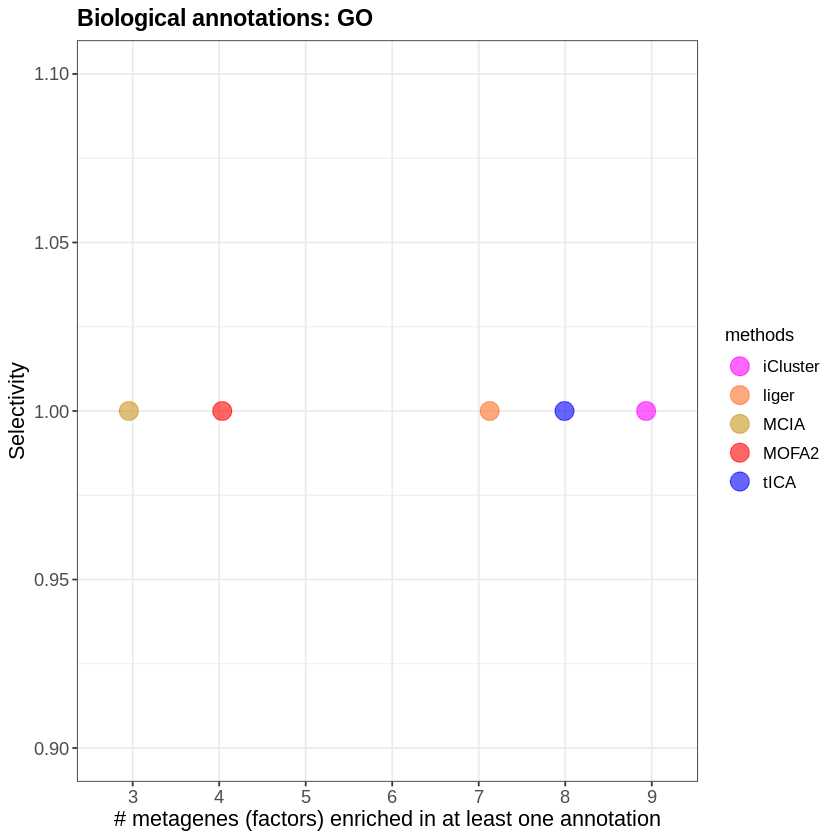

In [69]:
min_nonZero = min(res_go[, "nonZeroFacs"]) 
max_nonZero = max(res_go[, "nonZeroFacs"]) 
g <- ggplot(res_go, aes(x=nonZeroFacs,y=selectivity)) + 
    geom_point(aes(colour = methods), size=5, alpha=.6, position=position_jitter(h=0, w=0.15))+ 
    theme_bw() + 
    scale_shape_manual(values=c(15,17,16)) + 
    scale_color_manual(values=c('#FF00FF', '#FF6E28', '#C8961E', '#FF0000', '#0000FF', '#A0A0A0', '#48D1CC', '#00FF00')) +
    ylim(floor(min((res_go[,"selectivity"]*10)-.4)) / 10,
         ceiling(max((res_go[,"selectivity"]*10)+.2)) / 10) +
    labs(title="Biological annotations: GO", 
         x="# metagenes (factors) enriched in at least one annotation") +
    theme(plot.title = element_text(size=14,face="bold"),
          axis.text = element_text(size=11),
          axis.title = element_text(size=13),
          legend.text=element_text(size=10)) +
    ylab("Selectivity") + 
    labs(colour = "methods") +
    guides(color = guide_legend(order = 1),shape = guide_legend(order = 2),size = guide_legend(order = 3)) + 
    scale_x_discrete(limits=min_nonZero:max_nonZero, labels = c(min_nonZero:max_nonZero));
g

In [70]:
res_hallmarks <- rbind(res_mofa_hallmarks, res_liger_hallmarks, res_mcia_hallmarks, res_tica_hallmarks, res_icluster_hallmarks)
res_hallmarks$methods <- c("MOFA2", "liger", "MCIA", "tICA", "iCluster")
res_hallmarks

,selectivity,nonZeroFacs,total_pathways,methods
,<dbl>,<dbl>,<dbl>,<chr>
n,1,7,7,MOFA2
n1,1,3,3,liger
n2,1,3,3,MCIA
n3,1,7,7,tICA
n4,1,7,7,iCluster


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


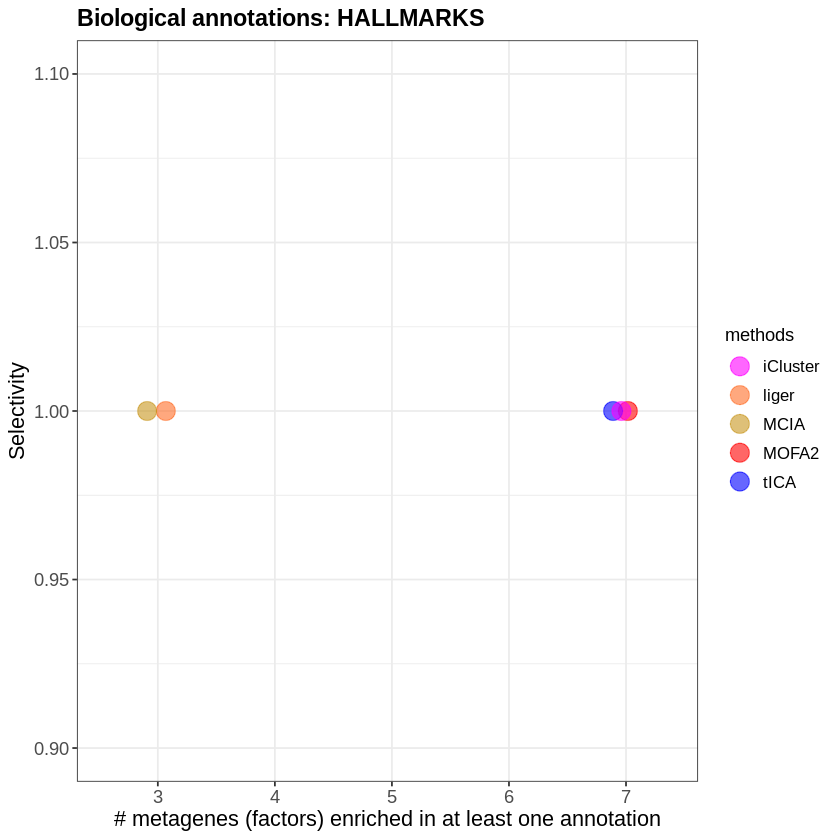

In [71]:
min_nonZero = min(res_hallmarks[, "nonZeroFacs"]) 
max_nonZero = max(res_hallmarks[, "nonZeroFacs"]) 
g <- ggplot(res_hallmarks, aes(x=nonZeroFacs,y=selectivity)) + 
    geom_point(aes(colour = methods), size=5, alpha=.6, position=position_jitter(h=0, w=0.15))+ 
    theme_bw() + 
    scale_shape_manual(values=c(15,17,16)) + 
    scale_color_manual(values=c('#FF00FF', '#FF6E28', '#C8961E', '#FF0000', '#0000FF', '#A0A0A0', '#48D1CC', '#00FF00')) +
    ylim(floor(min((res_hallmarks[,"selectivity"]*10)-.4)) / 10,
         ceiling(max((res_hallmarks[,"selectivity"]*10)+.2)) / 10) +
    labs(title="Biological annotations: HALLMARKS", 
         x="# metagenes (factors) enriched in at least one annotation") +
    theme(plot.title = element_text(size=14,face="bold"),
          axis.text = element_text(size=11),
          axis.title = element_text(size=13),
          legend.text=element_text(size=10)) +
    ylab("Selectivity") + 
    labs(colour = "methods") +
    guides(color = guide_legend(order = 1),shape = guide_legend(order = 2),size = guide_legend(order = 3)) + 
    scale_x_discrete(limits=min_nonZero:max_nonZero, labels = c(min_nonZero:max_nonZero));
g

In [72]:
res_reactome <- rbind(res_mofa_reactome, res_liger_reactome, res_mcia_reactome, res_tica_reactome, res_icluster_reactome)
res_reactome$methods <- c("MOFA2", "liger", "MCIA", "tICA", "iCluster")
res_reactome

,selectivity,nonZeroFacs,total_pathways,methods
,<dbl>,<dbl>,<dbl>,<chr>
n,1.0000000,2,2,MOFA2
n1,1.0000000,6,6,liger
n2,1.0000000,2,2,MCIA
n3,0.8571429,7,5,tICA
n4,1.0000000,7,7,iCluster


Warning message:
“Continuous limits supplied to discrete scale.
Did you mean `limits = factor(...)` or `scale_*_continuous()`?”


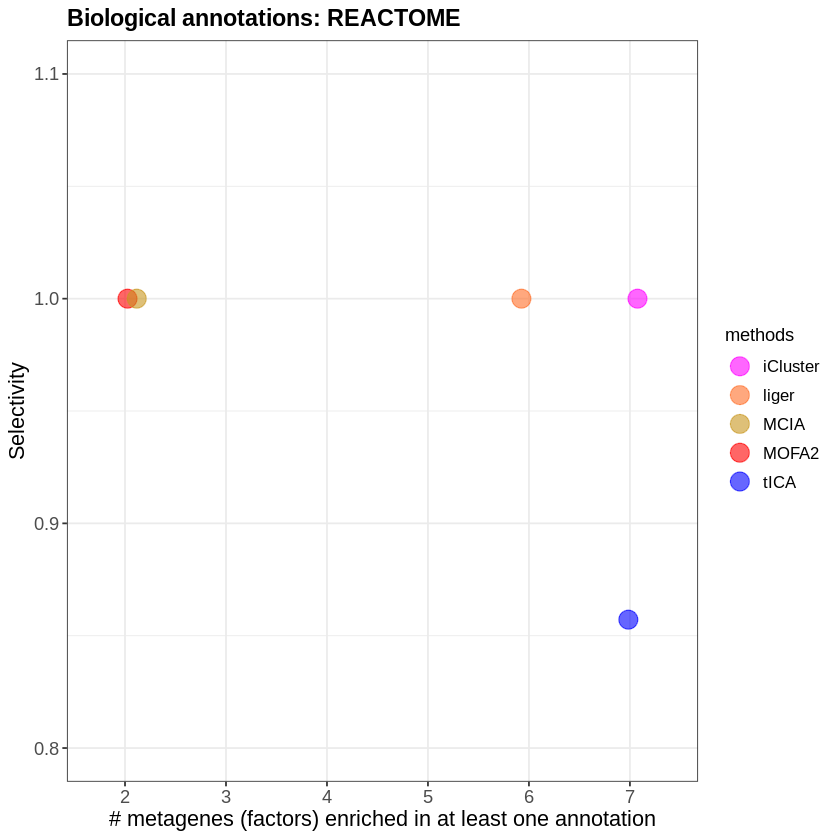

In [73]:
min_nonZero = min(res_reactome[, "nonZeroFacs"]) 
max_nonZero = max(res_reactome[, "nonZeroFacs"]) 
g <- ggplot(res_reactome, aes(x=nonZeroFacs,y=selectivity)) + 
    geom_point(aes(colour = methods), size=5, alpha=.6, position=position_jitter(h=0, w=0.15))+ 
    theme_bw() + 
    scale_shape_manual(values=c(15,17,16)) + 
    scale_color_manual(values=c('#FF00FF', '#FF6E28', '#C8961E', '#FF0000', '#0000FF', '#A0A0A0', '#48D1CC', '#00FF00')) +
    ylim(floor(min((res_reactome[,"selectivity"]*10)-.4)) / 10,
         ceiling(max((res_reactome[,"selectivity"]*10)+.2)) / 10) +
    labs(title="Biological annotations: REACTOME", 
         x="# metagenes (factors) enriched in at least one annotation") +
    theme(plot.title = element_text(size=14,face="bold"),
          axis.text = element_text(size=11),
          axis.title = element_text(size=13),
          legend.text=element_text(size=10)) +
    ylab("Selectivity") + 
    labs(colour = "methods") +
    guides(color = guide_legend(order = 1),shape = guide_legend(order = 2),size = guide_legend(order = 3)) + 
    scale_x_discrete(limits=min_nonZero:max_nonZero, labels = c(min_nonZero:max_nonZero));
g

In [74]:
save(res_go, res_reactome, res_hallmarks, file = "/sibcb1/chenluonanlab6/zhangchuanchao2/ASTAR-seq/benchmark/astar_annotations.Rdata")